In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-05-09T09:13:22.607443-05:00

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.22.2

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 167 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [3]:
import geopandas as gpd
import libpysal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely
import spopt
import warnings
## import geobr
import os

from sklearn.metrics import pairwise as skm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%watermark -w
%watermark -iv

Watermark: 2.4.3

shapely   : 2.0.3
numpy     : 1.26.4
geopandas : 0.14.3
pandas    : 2.2.1
spopt     : 0.6.0
libpysal  : 4.10
sklearn   : 1.4.2
matplotlib: 3.8.3



In [4]:
diretorio_atual = os.getcwd()
print(f"O diretorio atual e {diretorio_atual}")

O diretorio atual e d:\OneDrive\PROJETOS_R_GIT\2024\CLUSTER_MINAS_GERAIS\CODIGOS


In [5]:
os.chdir('..')

In [6]:
# Base de dados

dados = pd.read_csv('DADOS/base_tratada_skater.csv')

In [7]:
dados.head()

,Unnamed: 0,VAR_001,VAR_003,VAR_004,VAR_005,VAR_006,VAR_007,VAR_008,VAR_009,VAR_010,...,H,I,J,K,L,M,N,O,P,Q
0,0,3100104,6272,-0.55,62.49,98.88,70.88,70.45,99.88,75.77,...,364.0,1633.0,156.0,5238.0,780.0,0.0,3699.0,1890.0,292.0,0.0
1,1,3100203,22675,-0.01,86.84,94.74,87.67,85.19,99.75,91.62,...,2870.0,8810.0,1862.0,75424.0,1560.0,1730.0,27693.0,9233.0,1908.0,0.0
2,2,3100302,13927,0.38,54.70,90.81,62.50,53.47,99.96,68.01,...,2184.0,3209.0,690.0,9906.0,780.0,1230.0,11322.0,3561.0,574.0,0.0
3,3,3100401,3909,-0.02,65.13,99.47,74.65,42.34,100.00,89.18,...,1092.0,396.0,156.0,2541.0,0.0,0.0,3834.0,1280.0,228.0,0.0
4,4,3100500,8943,-1.15,46.76,97.53,43.32,46.15,99.33,58.75,...,1645.0,2250.0,204.0,4163.0,0.0,10.0,4644.0,1092.0,291.0,0.0


<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
C:\Users\mateu\AppData\Local\Temp\ipykernel_30564\431539506.py:2: SyntaxWarning: invalid escape sequence '\O'
  shapefile_path = "D:\OneDrive\PROJETOS_R_GIT\\2024\BR_Municipios_2022"


    CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1  1100023              Ariquemes       RO  4426.571   
2  1100031                 Cabixi       RO  1314.352   
3  1100049                 Cacoal       RO  3793.000   
4  1100056             Cerejeiras       RO  2783.300   

                                            geometry  
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...  
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...  
4  POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...  


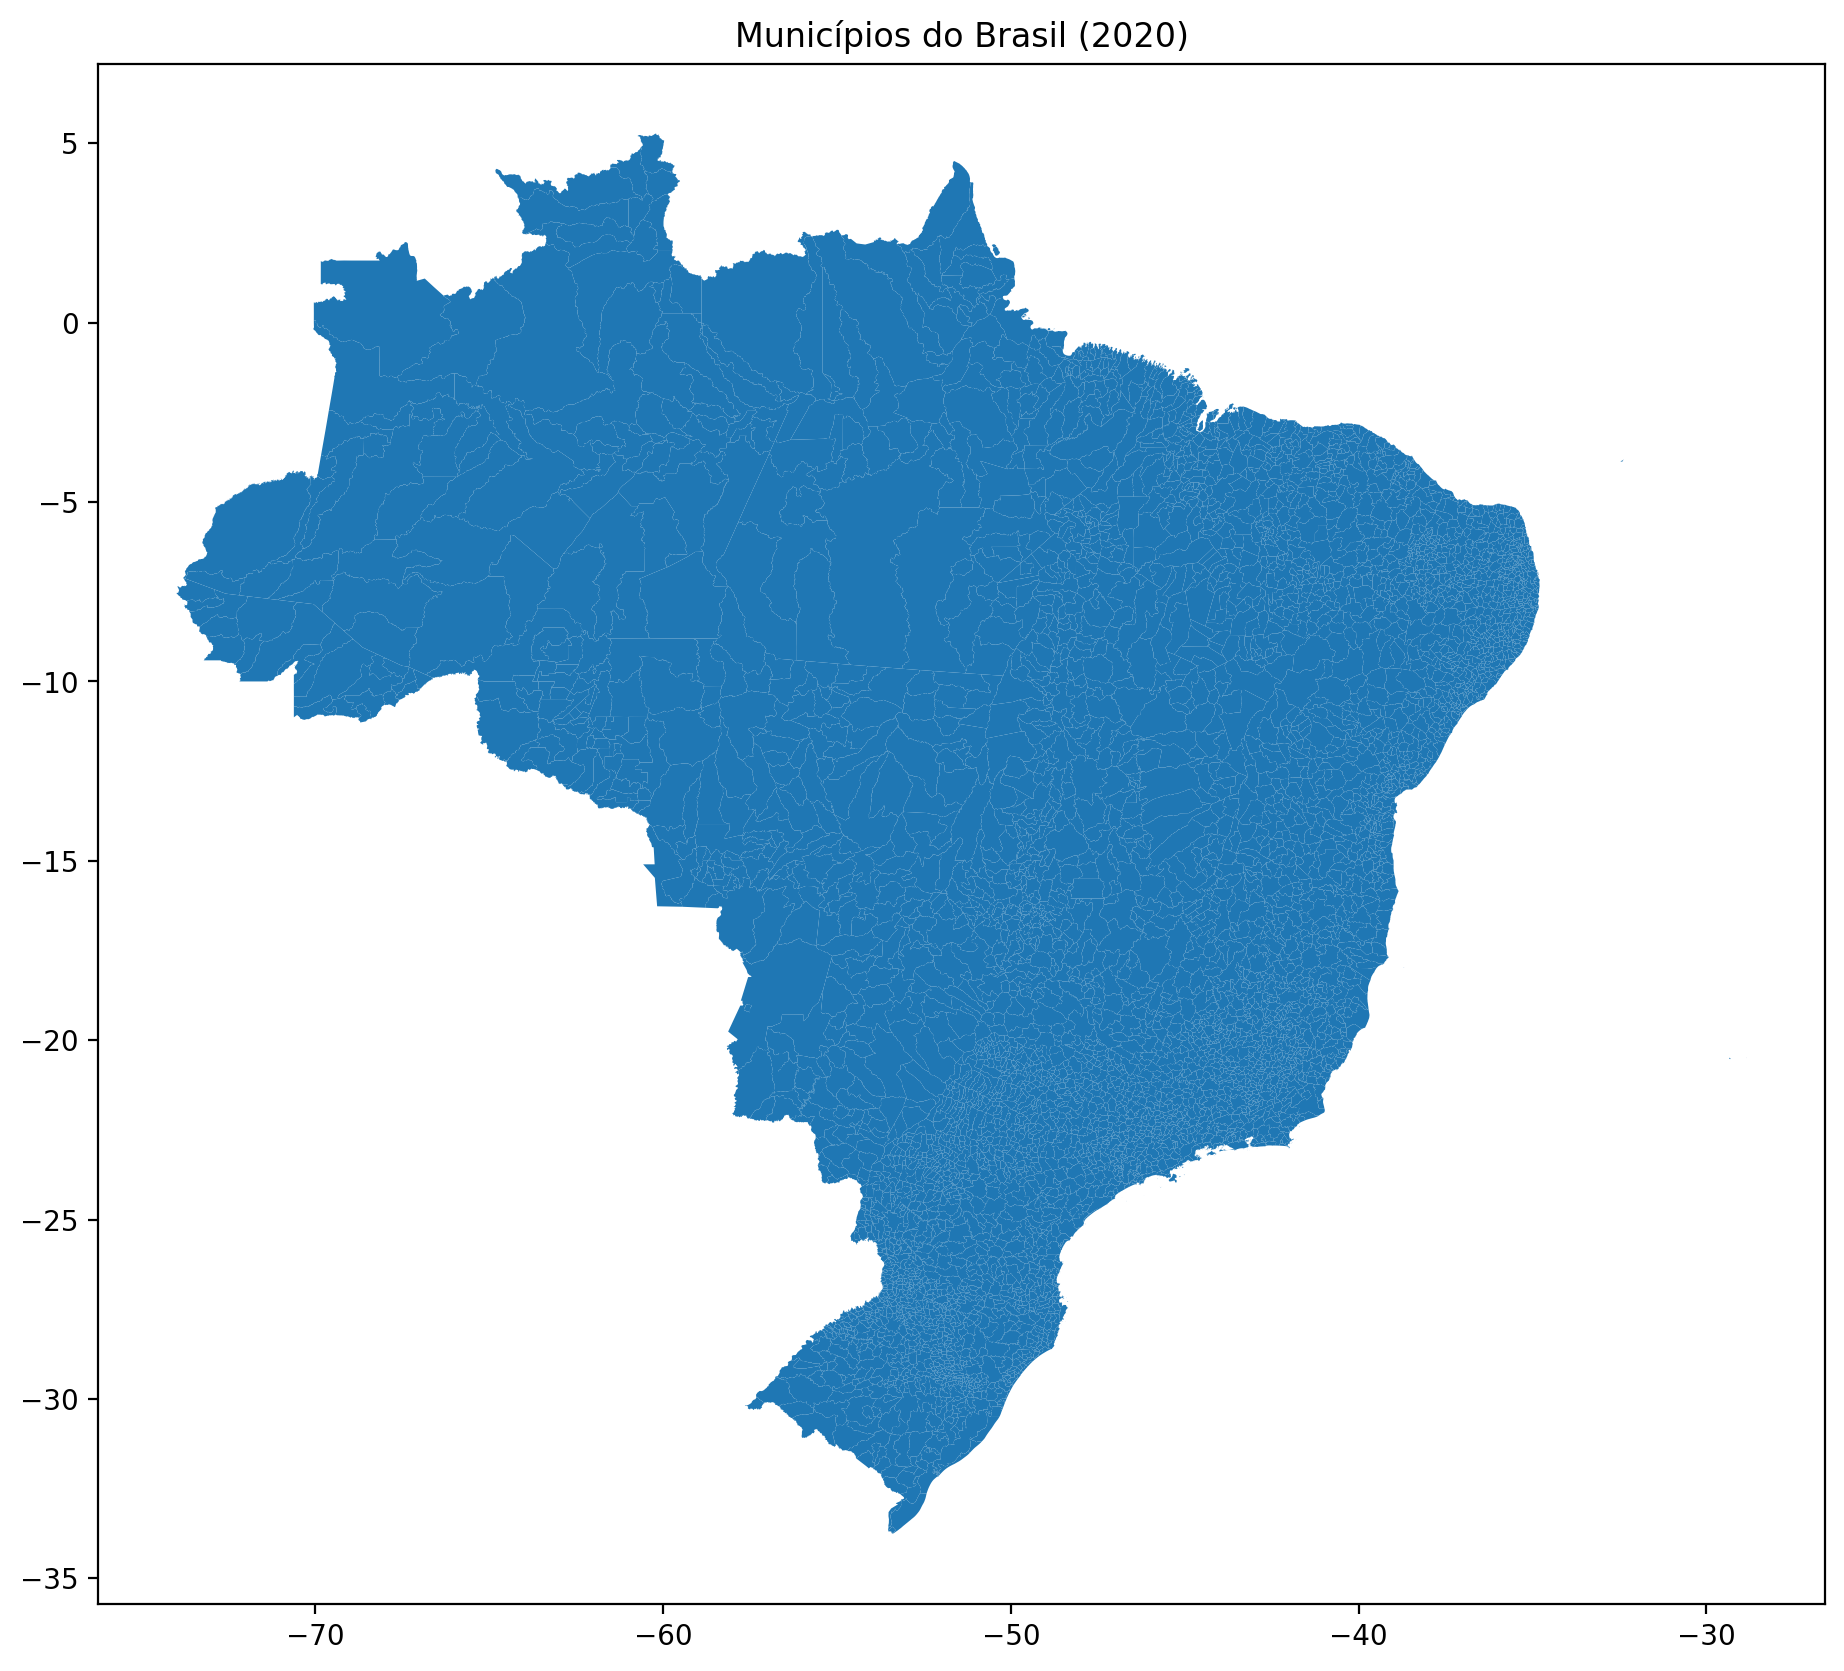

In [10]:
# Caminho para o shapefile baixado do IBGE
shapefile_path = "D:\OneDrive\PROJETOS_R_GIT\\2024\BR_Municipios_2022"

# Carregar os dados com geopandas
df_municipios = gpd.read_file(shapefile_path)

# Exibir os primeiros registros
print(df_municipios.head())

# Plotar os dados dos municípios
df_municipios.plot(figsize=(15, 10))
plt.title("Municípios do Brasil (2020)")
plt.show()

In [11]:
# Juncao das Bases
dados['VAR_001'] = dados['VAR_001'].astype(str)

 
dados_tmp = pd.merge(dados, df_municipios, left_on='VAR_001', right_on='CD_MUN' ,how = 'left')

In [12]:
dados_tmp = gpd.GeoDataFrame(dados_tmp, geometry=dados_tmp['geometry'])

In [20]:
dados_tmp.shape

(853, 50)

In [21]:
dados_tmp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Unnamed: 0              853 non-null    int64   
 1   VAR_001                 853 non-null    object  
 2   VAR_003                 853 non-null    int64   
 3   VAR_004                 853 non-null    float64 
 4   VAR_005                 853 non-null    float64 
 5   VAR_006                 853 non-null    float64 
 6   VAR_007                 853 non-null    float64 
 7   VAR_008                 853 non-null    float64 
 8   VAR_009                 853 non-null    float64 
 9   VAR_010                 853 non-null    float64 
 10  VAR_011                 853 non-null    float64 
 11  VAR_012                 853 non-null    float64 
 12  VAR_017                 853 non-null    float64 
 13  VAR_018                 853 non-null    float64 
 14  VAR_019           

(-51.605544457, -39.297366245, -23.3572339897, -13.7987019363)

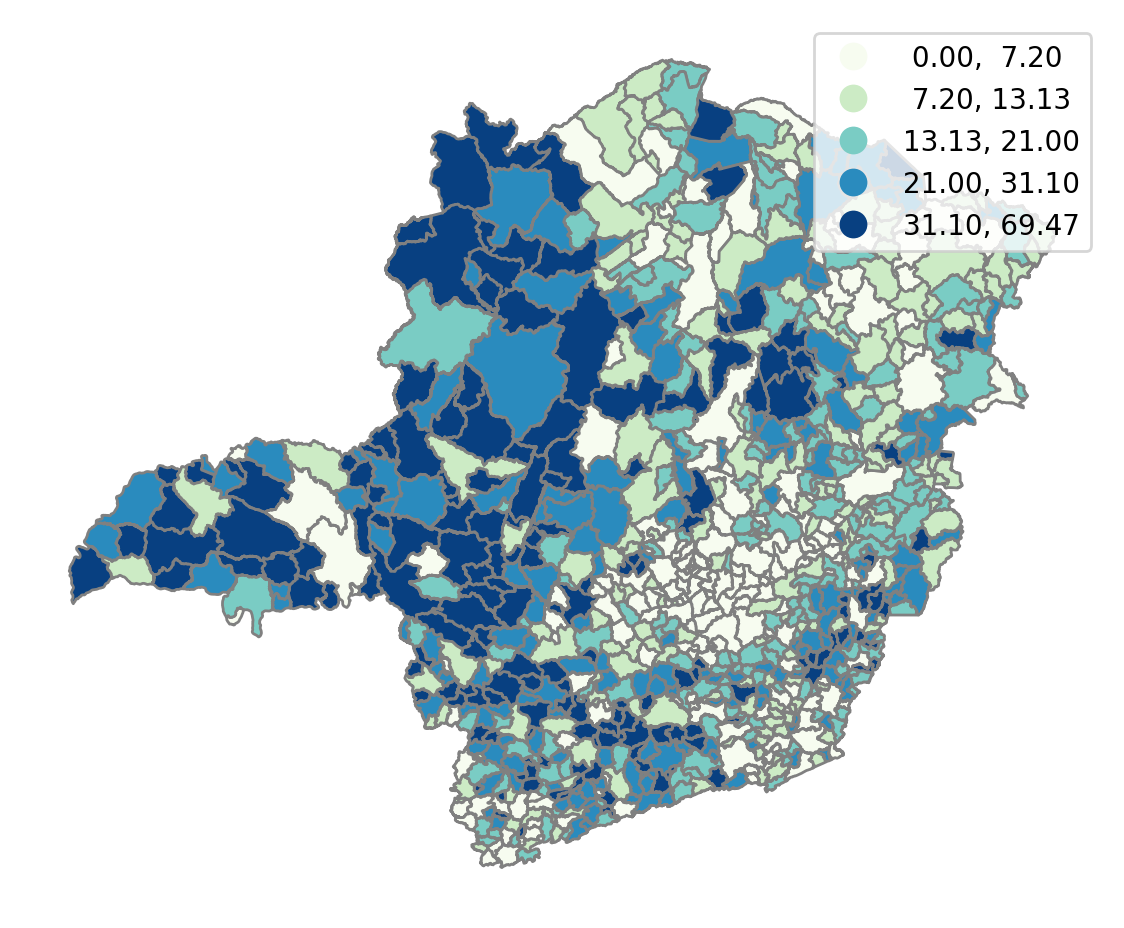

In [28]:
# Visualizando uma variavel no grafico para teste

dados_tmp.plot(
    figsize=(7,14),
    column = 'prop_va_agropecuaria',
    scheme = 'Quantiles',
    cmap = 'GnBu',
    edgecolor = 'grey',
    legend=True
).axis("off")

In [19]:
# Definindo os parametros
dados_tmp.columns

Index(['Unnamed: 0', 'VAR_001', 'VAR_003', 'VAR_004', 'VAR_005', 'VAR_006',
       'VAR_007', 'VAR_008', 'VAR_009', 'VAR_010', 'VAR_011', 'VAR_012',
       'VAR_017', 'VAR_018', 'VAR_019', 'VAR_020', 'VAR_021', 'VAR_022',
       'VAR_023', 'VAR_031', 'VAR_055', 'id_municipio_x',
       'prop_impostos_liquidos', 'prop_va_agropecuaria', 'prop_va_industria',
       'prop_va_servicos', 'prop_va_adespss', 'id_municipio_y', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q',
       'CD_MUN', 'NM_MUN', 'SIGLA_UF', 'AREA_KM2', 'geometry'],
      dtype='object')

In [29]:
attrs_name = dados_tmp.iloc[:,2:45].columns
attrs_name = attrs_name.drop(['id_municipio_x', 'id_municipio_y'])

In [30]:
# Spatial weights

w = libpysal.weights.Queen.from_dataframe(dados_tmp, use_index=False)

In [31]:
# numero de clusters

n_cluster = 5

In [32]:
floor = 0

In [33]:
trace = False

In [34]:
islands = 'ignore'

In [35]:
spannning_forest_kwds = dict(
    dissimilarity = skm.manhattan_distances,
    affinity = None,
    reduction = np.sum,
    center = np.mean,
    verbose = 2
)

In [36]:
# Tratando as variaveis - Padronizando

scaler = MinMaxScaler()

dados_tmp[attrs_name] = scaler.fit_transform(dados_tmp[attrs_name])

In [37]:
# Rodando as regioes
n_cluster = 15

model = spopt.region.Skater(
    dados_tmp,
    w,
    attrs_name,
    n_clusters=n_cluster,
    floor=floor,
    trace = trace,
    islands=islands,
    spanning_forest_kwds=spannning_forest_kwds
)

model.solve()

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Computing Affinity Kernel took 0.00s
Computing initial MST took 0.00s
Computing connected components took 0.00s.


finding cut...: 100%|██████████| 852/852 [00:00<00:00, 1666.28it/s]


making cut deletion(in_node=569, out_node=748, score=2077.080432040394)...


finding cut...: 100%|██████████| 851/851 [00:00<00:00, 1320.55it/s]


making cut deletion(in_node=135, out_node=624, score=2017.8622728187222)...


finding cut...: 100%|██████████| 850/850 [00:00<00:00, 1099.30it/s]


making cut deletion(in_node=244, out_node=711, score=1969.9410842028262)...


finding cut...: 100%|██████████| 849/849 [00:00<00:00, 985.42it/s] 


making cut deletion(in_node=65, out_node=204, score=1935.2138743514456)...


finding cut...: 100%|██████████| 848/848 [00:00<00:00, 889.50it/s]


making cut deletion(in_node=19, out_node=155, score=1903.1000719360363)...


finding cut...: 100%|██████████| 847/847 [00:01<00:00, 809.58it/s]


making cut deletion(in_node=224, out_node=688, score=1886.093351675314)...


finding cut...: 100%|██████████| 846/846 [00:01<00:00, 709.94it/s]


making cut deletion(in_node=563, out_node=611, score=1850.3854148851078)...


finding cut...: 100%|██████████| 845/845 [00:01<00:00, 655.07it/s]


making cut deletion(in_node=351, out_node=355, score=1833.5272201353982)...


finding cut...: 100%|██████████| 844/844 [00:01<00:00, 588.83it/s]


making cut deletion(in_node=521, out_node=822, score=1817.463201383898)...


finding cut...: 100%|██████████| 843/843 [00:01<00:00, 566.28it/s]


making cut deletion(in_node=181, out_node=725, score=1801.5246134899128)...


finding cut...: 100%|██████████| 842/842 [00:01<00:00, 539.72it/s]


making cut deletion(in_node=384, out_node=656, score=1788.8939767909242)...


finding cut...: 100%|██████████| 841/841 [00:01<00:00, 504.43it/s]


making cut deletion(in_node=84, out_node=339, score=1776.2740811661786)...


finding cut...: 100%|██████████| 840/840 [00:01<00:00, 464.41it/s]


making cut deletion(in_node=351, out_node=802, score=1764.694309173747)...


finding cut...: 100%|██████████| 839/839 [00:01<00:00, 446.44it/s]

making cut deletion(in_node=73, out_node=419, score=1754.4586020957113)...


In [75]:
dados_tmp['regioes'] = model.labels_

(-51.605544457, -39.297366245, -23.3572339897, -13.7987019363)

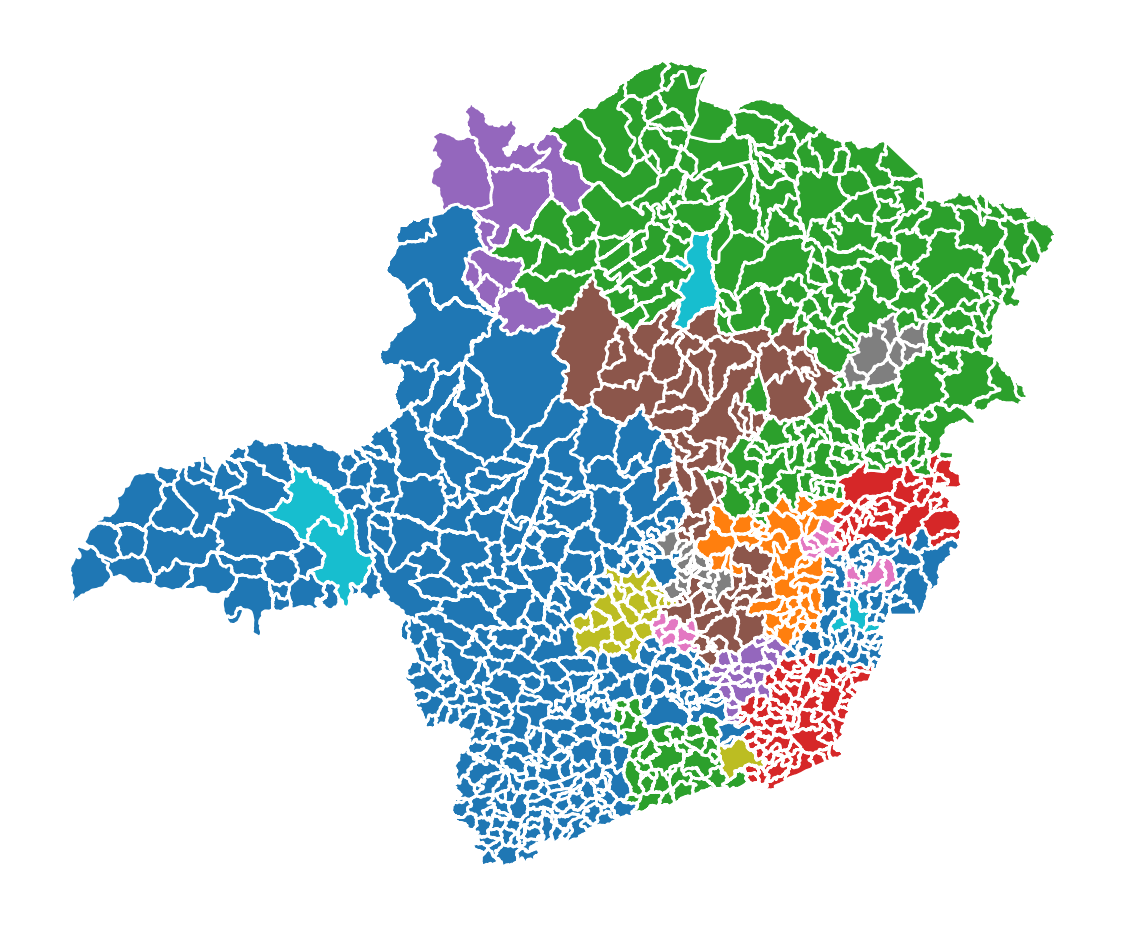

In [76]:
dados_tmp.plot(
    figsize=(7,14),
    column = 'regioes',
    categorical = True,
    edgecolor = 'white'
).axis("off")

In [ ]:
dados_tmp['indicador'] = 1
dados_tmp[[]]